In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import os

In [ ]:
ice_cream = pd.read_csv('./icecream_temp.csv')
ice_cream

,temperature,sales
0,60,39.69
1,80,61.59
2,58,33.44
3,96,80.02
4,95,80.75
...,...,...
360,50,22.89
361,89,73.16
362,81,64.23
363,73,55.01


In [ ]:
x = ice_cream["temperature" ].values.reshape(-1,1)
y = ice_cream["sales"].values.reshape(-1,1)
print("Shape: ", x.shape, y.shape)

Shape:  (365, 1) (365, 1)


Text(0, 0.5, 'Ice Cream Sales')

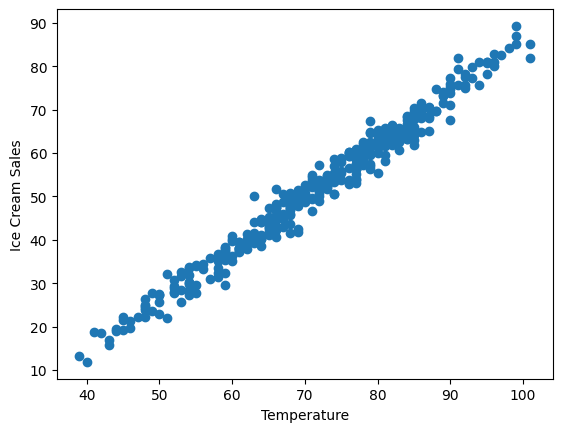

In [ ]:
plt.scatter(x, y)
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape[0]/365, x_test.shape[0]/365)


0.7479452054794521 0.25205479452054796


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('weight coefficients: ',model.coef_)
print('y-axis intercept: ',model.intercept_)

weight coefficients:  [[1.19149198]]
y-axis intercept:  [-33.65495298]


In [ ]:
model.score(x_test, y_test)

0.9786159273079298

In [ ]:
temp = np.array([row[0] for row in x]).reshape(-1,1)
x_min = np.array([[temp.min()]])
x_max = np.array([[temp.max()]])
print(f"Min x value: {x_min}")
print(f"Max x value: {x_max}")





Min x value: [[39]]
Max x value: [[101]]


In [ ]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min y value: {y_min}")
print(f"Max y value: {y_max}")

Min y value: [[12.81323416]]
Max y value: [[86.68573679]]


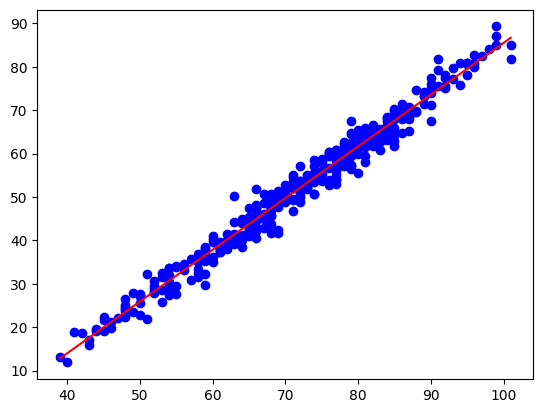

In [ ]:
plt.scatter(temp, y, c='blue')
plt.plot([x_min[0], x_max[0]],[y_min[0], y_max[0]], c ='red' )

In [24]:
df = pd.read_csv('/content/icecream_temp.csv')


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('icecream_temp.csv')
df.head()


,temperature,sales
0,60,39.69
1,80,61.59
2,58,33.44
3,96,80.02
4,95,80.75


In [33]:
X = df[['temperature']]
y = df['sales']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Regression Equation: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f}*Temperature")
print("R² Score:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

temps_to_predict = np.array([[50],[70],[85],[100]])
predicted_sales = model.predict(temps_to_predict)
for t, s in zip(temps_to_predict.flatten(), predicted_sales):
    print(f"Predicted sales at {t}°F: {s:.2f}")


Regression Equation: Sales = -33.70 + 1.19*Temperature
R² Score: 0.9770249461722685
Mean Squared Error: 5.857440361508498
Predicted sales at 50°F: 25.90
Predicted sales at 70°F: 49.74
Predicted sales at 85°F: 67.62
Predicted sales at 100°F: 85.50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Mon, 15 Sep 2025   Prob (F-statistic):          1.57e-299
Time:                        14:32:35   Log-Likelihood:                -840.52
No. Observations:                 365   AIC:                             1685.
Df Residuals:                     363   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.6982      0.702    -47.991      

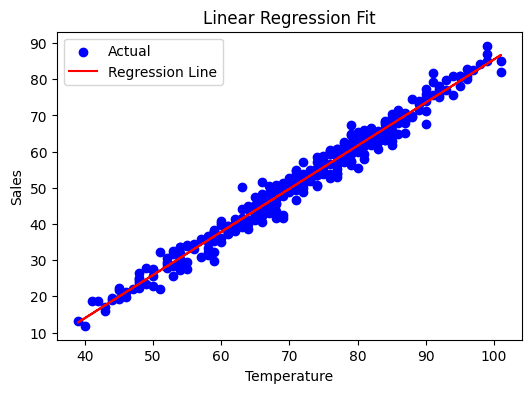

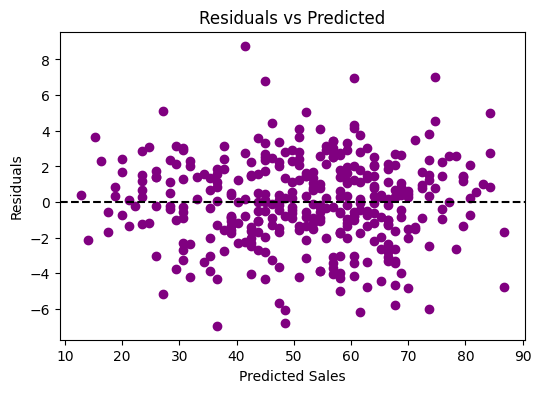

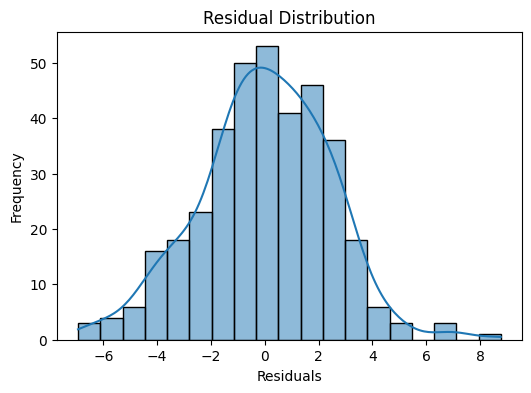

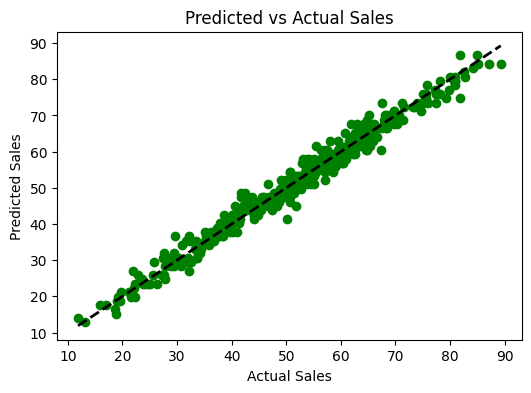

In [36]:
residuals = y - y_pred

plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.show()
